In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
# Set random seed for reproducibility
np.random.seed(0)

In [3]:
# Parameters
start_date_yearly = '2022-01-01'
end_date_yearly = '2022-12-31'
start_date_monthly = '2022-01-01'
end_date_monthly = '2022-01-31'
start_date_weekly = '2022-01-01'
end_date_weekly = '2022-01-07'
freq = 'D'
trend_coeff = 0.05    # Strength of the linear trend
seasonality_coeff = 3    # Strength of the seasonal component
residual_std = 1    # Standard deviation of the residual component

In [4]:
# Generate dates
dates_yearly = pd.date_range(start=start_date_yearly, end=end_date_yearly, freq=freq)
dates_monthly = pd.date_range(start=start_date_monthly, end=end_date_monthly, freq=freq)
dates_weekly = pd.date_range(start=start_date_weekly, end=end_date_weekly, freq=freq)
num_days = len(dates_yearly)

In [5]:
# Generate trend component
trend = np.arange(num_days) * trend_coeff

In [6]:
# Generate seasonal component
seasonality = (np.sin(2 * np.pi * np.arange(num_days) / 7) + np.sin(2 * np.pi * (np.arange(num_days) + 1)/ 7)) * seasonality_coeff

In [7]:
# Generate residual component
residual = np.random.normal(loc=25, scale=residual_std, size=num_days)

In [8]:
# Generate sales data by combining components
sales = trend + seasonality + residual

In [9]:
sales.shape

(365,)

In [10]:
sales[:30]

array([29.10954679, 30.72043539, 30.30517294, 27.3908932 , 22.84112304,
       19.00244394, 23.90459397, 27.54413724, 30.56705933, 30.08703346,
       25.64404357, 22.77783855, 21.09075954, 23.42618057, 28.48935768,
       31.35395251, 31.52051403, 25.64484174, 21.98663275, 19.82562608,
       21.10151574, 29.04911304, 32.23471438, 29.63426993, 28.46975462,
       20.56919937, 21.07548033, 23.8173217 , 30.27827366, 33.18963695])

In [11]:
# Create a DataFrame
df_yearly = pd.DataFrame({'Date': dates_yearly, 'Sales': sales})
df_monthly = pd.DataFrame({'Date': dates_monthly, 'Sales': sales[:31]})
df_weekly = pd.DataFrame({'Date': dates_weekly, 'Sales': sales[:7]})

In [12]:
df_yearly

,Date,Sales
0,2022-01-01,29.109547
1,2022-01-02,30.720435
2,2022-01-03,30.305173
3,2022-01-04,27.390893
4,2022-01-05,22.841123
...,...,...
360,2022-12-27,43.698457
361,2022-12-28,38.827336
362,2022-12-29,38.761570
363,2022-12-30,41.144471


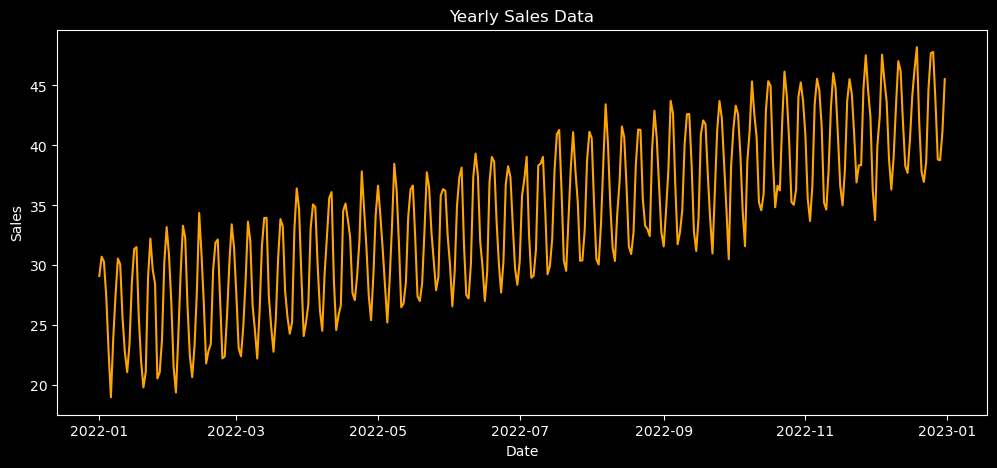

In [13]:
# Plot the sales data
plt.figure(figsize=(12, 5))
plt.plot(df_yearly['Date'], df_yearly['Sales'], color = 'orange')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Yearly Sales Data')
plt.show()

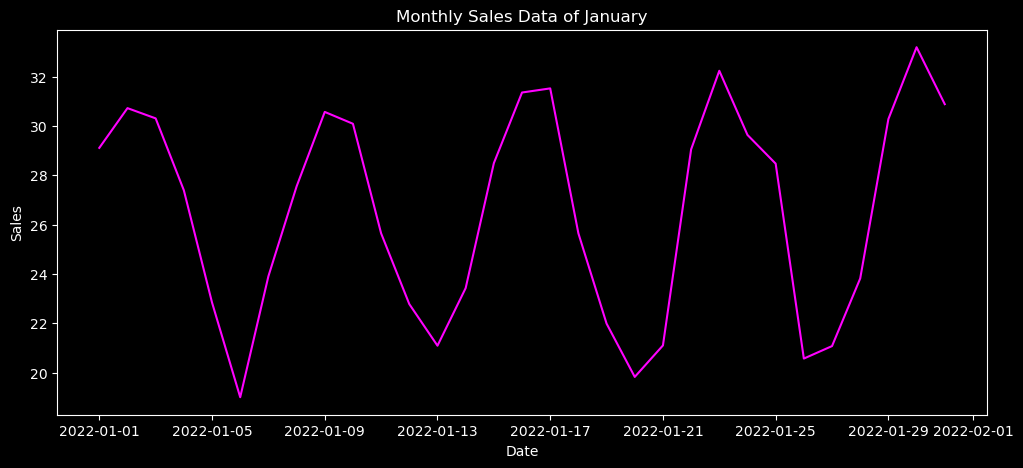

In [14]:
# Plot the sales data
plt.figure(figsize=(12, 5))
plt.plot(df_monthly['Date'], df_monthly['Sales'], color = 'magenta')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Data of January')
plt.show()

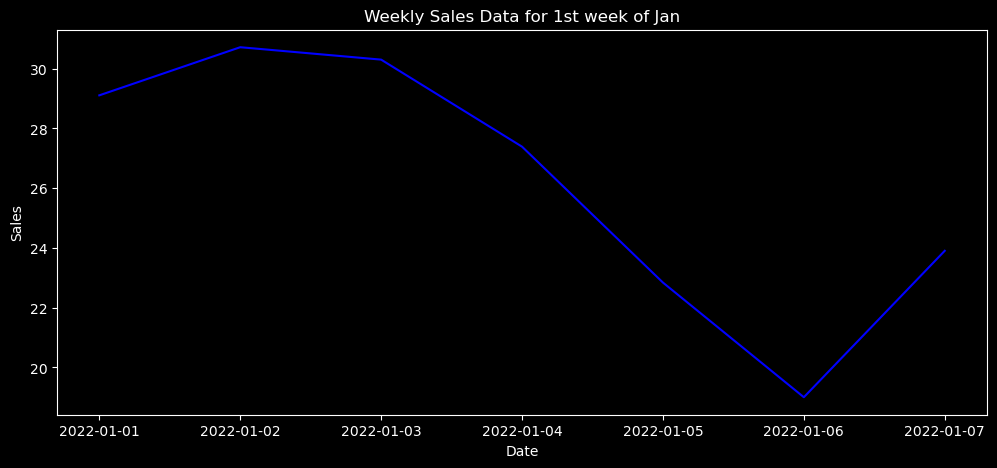

In [15]:
# Plot the sales data
plt.figure(figsize=(12, 5))
plt.plot(df_weekly['Date'], df_weekly['Sales'], color = 'blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Data for 1st week of Jan')
plt.show()

In [16]:
result=seasonal_decompose(df_yearly['Sales'], model='multiplicable', period=12)

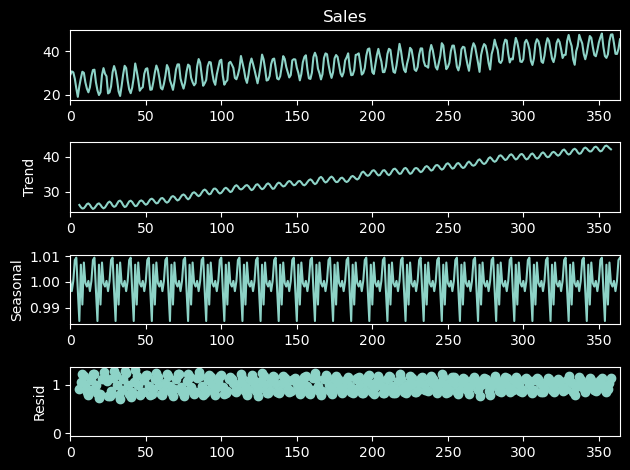

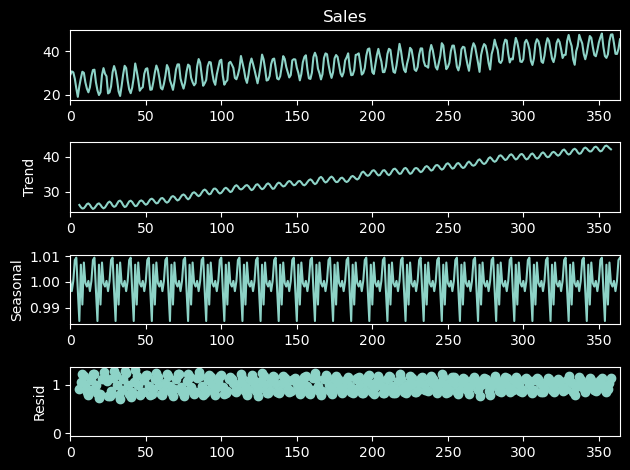

In [17]:
result.plot()

In [18]:
import os

# Get the current working directory
current_directory = os.getcwd()

In [19]:
# df_yearly.to_csv('sales.csv', sep=',', index=True, header=True)
